In [85]:
library(ISLR2)
set.seed(1)
library(boot)

## The Bootstrap

In [87]:
alpha.fn <- function(data, index) {
  X <- data$X[index]
  Y <- data$Y[index]
  (var(Y) - cov(X, Y)) / (var(X) + var(Y) - 2 * cov(X, Y))
}

This function *returns*, or outputs, an  estimate for $\alpha$ based on applying ( 5.7) to the observations indexed by the argument `index`.
For instance, the following command tells `R` to estimate $\alpha$ using
all $100$ observations.

In [88]:
# write.csv(Portfolio,"../data/Portfolio.csv", row.names = FALSE)

In [89]:
Portfolio

X,Y
<dbl>,<dbl>
-0.89525089,-0.23492353
-1.56245433,-0.88517599
-0.41708988,0.27188802
1.04435573,-0.73419750
-0.31556841,0.84198343
-1.73712385,-2.03719104
1.96641316,1.45295666
2.15286790,-0.43413863
-0.08120803,1.45080850


In [92]:
alpha.fn(Portfolio, 1:100)

[1] 0.5758321

The next command  uses the `sample()` function to randomly select
$100$ observations from the range $1$ to $100$, with replacement. This is equivalent
to constructing a new bootstrap data set and recomputing $\hat{\alpha}$
based on the new data set.

In [154]:
sample(1:100, 100, replace = T)

[1]  16 100  35  24  20  65  59  58   6  93  13  55  76  45   7  26  67  67
 [19]  29  85  83  57  68   6  88  32  46  27  22  70   2  48  46  96  40  92
 [37]   9  62  84  50  41  25  55  38  79  45  38  12  31  64  70  66  84  43
 [55]  52  37  84  32  61  89  58  43  32  92  81  37  95  17  67  79  11  61
 [73]  30  35  88  11  58   6  14  93  85  21  67  61  43  23  49   4  71  92
 [91]  72  24  79  58   3  22  65  55  81   6

In [121]:
#set.seed(8)
alpha.fn(Portfolio, sample(100, 100, replace = T))

[1] 0.7240326

We can implement a bootstrap analysis by performing this command many times, recording all of
the corresponding estimates for $\alpha$, and computing the resulting
standard deviation.
However, the `boot()` function automates this approach. Below we produce $R=1,000$ bootstrap estimates for $\alpha$.


In [122]:
boot(Portfolio, alpha.fn, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.5758321 0.002221554  0.09282265

In [123]:
example = boot(Portfolio, alpha.fn, R = 1000)
example


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.5758321 0.003091361  0.09162299

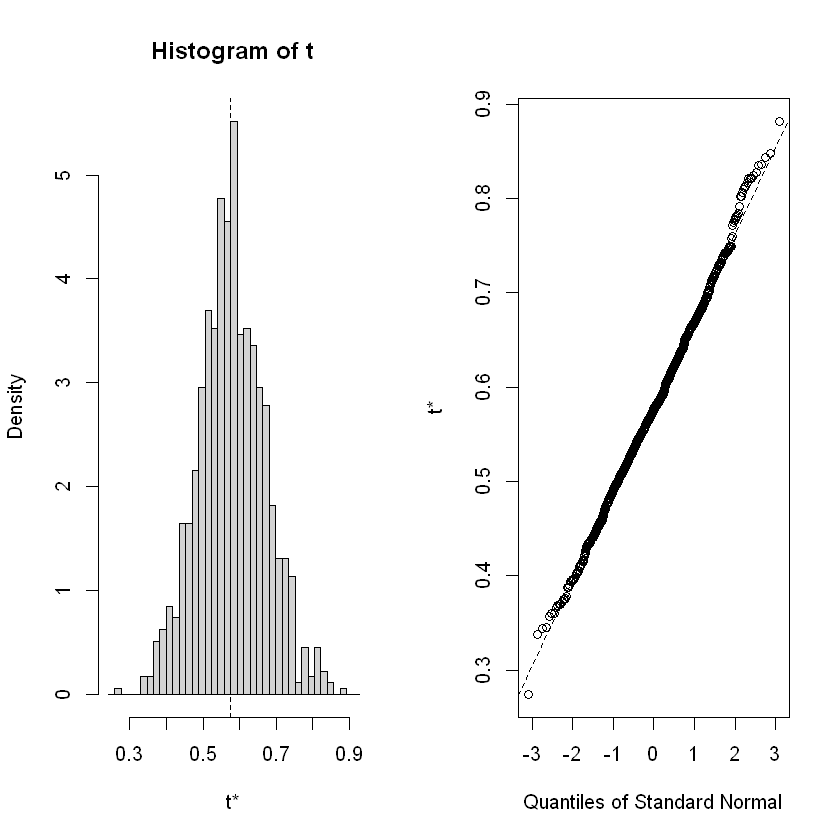

In [124]:
plot(example)

The final output shows that using the original data, $\hat{\alpha}=0.5758$,
and that the bootstrap estimate for ${\rm SE}(\hat{\alpha})$ is $0.0897$.

\subsubsection{Estimating the Accuracy of a Linear Regression Model}

The bootstrap approach can be used  to assess the
variability of the coefficient estimates and predictions from a statistical learning method. Here we use the bootstrap approach in order to assess the variability of
the estimates for $\beta_0$ and $\beta_1$, the intercept and slope terms for the linear regression model
that uses  `horsepower` to predict `mpg` in the `Auto` data set. We will compare the estimates obtained using the bootstrap to those obtained using the formulas
for ${\rm SE}(\hat{\beta}_0)$ and ${\rm SE}(\hat{\beta}_1)$ described
in Section 3.1.2.

We first create a simple function, `boot.fn()`, which takes in the
`Auto` data set as well as a set of indices for the observations, and
returns the intercept and slope estimates for the linear regression model. We then apply this function
to the full set of $392$ observations in order to compute the estimates of $\beta_0$ and $\beta_1$ on the entire data set using the usual linear regression coefficient estimate
formulas from Chapter 3. Note that we do not need the `{` and `}` at the beginning and end of the function because it is only one line long.

In [125]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500
7,14,8,454,220,4354,9.0,70,1,chevrolet impala
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii
9,14,8,455,225,4425,10.0,70,1,pontiac catalina


In [155]:
boot.fn <- function(data, index)
  coef(lm(mpg ~ horsepower, data = data, subset = index))

In [156]:
lm(mpg ~ horsepower, data = Auto)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Coefficients:
(Intercept)   horsepower  
    39.9359      -0.1578  


In [129]:
boot.fn(Auto, 1:392)

(Intercept)  horsepower 
 39.9358610  -0.1578447

 The `boot.fn()` function can also be used in order to create
 bootstrap estimates for the intercept and slope terms by randomly sampling from among the observations with replacement. Here we give two examples.

In [131]:
sample(1:392, 392, replace = T)

[1] 321 257 365  49  44 134  27 351  88 334 304 193  93 376  89  74 123   2
 [19] 118  30  30 235 288 340 165  13 337 343 386 261  59  58  84  66 378 148
 [37] 161 143 368   7 230  86 220 235 327 106 253 358  97   2 213 163 170  42
 [55] 254 108  92 210 223 265  97 248 383 154  90 146  83 226   9  76 376 326
 [73] 216 267  54 280 169 225  39 254 215 117 103 103 368 196 160 144 290  38
 [91]  47 259 278 262  30  91 198 386 291  27  41 218 235  58 304 196 203  83
[109] 167 226 363  59 348  60 232 154 107  17 205   4  50 357 226  87 306  99
[127]  64 312 285  27 354 171 304 324 110 259 250 215 123 253 241 289 194 247
[145] 354 147 182 252 373 203 294 355 304 256 342 233 268  42 347 301 364  34
[163] 289 133 206 386 133  15 302 304 125 237 272 234  25 183 352 371   4 382
[181]  15 182  63  33 324 117 112 222  13  83 335 144 330 137 120  34 134 251
[199]  92  96  94 377  14 338  83 232   1 136 289 265 384  94 287 379  73 252
[217] 249 333   6 272 125 233 272 381  11 239 169 164  60 118 354 107 314  81
[235] 150 367 349 236  74 266  29  61  87   1 261  29  77 388  82 290 194  91
[253]  54  13  57  80 282 289  61 178 231 288  31 362 296 182 319 153 330 291
[271]   6 178 272 321 321 331  60 183 317 103 185 148 166 183 290 315  60  55
[289] 353 297 388 127  66 114 242  61 151 331  73  78 178 214  10  70 208 120
[307]  89 286 151 111 373 148 322  29 153 167  70 258 147  79 173 207  19 178
[325]  35 296  73 382 228 308 101 260 201 159 198  75 182 136 327  32  36 269
[343] 343  29 121 265  28  26 273  74 176 249  82 257  52 171 246  37 101   5
[361] 245 318  48 203 164 106 250 261 193 114 276  14 143  51 298  99  35  65
[379] 319  21 234 139  60  32  55 374 176  22 111  88 332 202

In [142]:
set.seed(1)
boot.fn(Auto, sample(392, 392, replace = T))
boot.fn(Auto, sample(392, 392, replace = T))

(Intercept)  horsepower 
 40.3404517  -0.1634868

(Intercept)  horsepower 
 40.1186906  -0.1577063

Next, we use the `boot()` function to compute the standard errors of 1,000 bootstrap estimates for the intercept and slope terms.

In [145]:
boot(Auto, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
      original        bias    std. error
t1* 39.9358610  0.0269869095 0.855401374
t2* -0.1578447 -0.0002153158 0.007404461

This indicates that the bootstrap estimate for ${\rm SE}(\hat{\beta}_0)$ is $0.84$, and that the bootstrap estimate for ${\rm SE}(\hat{\beta}_1)$ is $0.0073$.
As discussed in Section 3.1.2, standard formulas can be used to compute the standard errors for the regression coefficients in a linear model. These can be obtained using the  `summary()` function.

In [146]:
summary(lm(mpg ~ horsepower, data = Auto))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),39.9358610,0.717498656,55.65984,1.220362e-187
horsepower,-0.1578447,0.006445501,-24.48914,7.031989e-81


The standard error estimates for $\hat{\beta}_0$ and
$\hat{\beta}_1$ obtained using the formulas from
Section 3.1.2 are $0.717$ for the intercept and $0.0064$
for the slope. Interestingly, these are somewhat different from the
estimates obtained using the bootstrap.  Does this indicate a problem
with the bootstrap? In fact, it suggests the opposite.  Recall that
the standard formulas given in Equation 3.8 on page66 rely on certain assumptions. For example, they depend
on the unknown parameter $\sigma^2$, the noise variance. We then estimate $\sigma^2$
using the RSS. Now although the formulas for the standard errors do not rely on the linear model
being correct, the estimate for $\sigma^2$ does.
We see in
Figure 3.8 on page91 that there is a non-linear relationship in
the data, and so the residuals from a linear fit will be inflated, and so will $\hat{\sigma}^2$.
Secondly, the standard formulas assume (somewhat unrealistically) that the $x_i$ are fixed, and all the variability comes from the variation in the errors $\epsilon_i$.
 The bootstrap approach does not rely on any of these assumptions, and so it is
likely giving a more accurate estimate of the standard errors of
$\hat{\beta}_0$ and $\hat{\beta}_1$ than is the `summary()`
function.

Below we compute the bootstrap standard error estimates and the standard
linear regression estimates that result from fitting the quadratic model to the data. Since this model provides a good fit to the data (Figure 3.8), there is now a better correspondence between the bootstrap estimates and the standard estimates of ${\rm SE}(\hat{\beta}_0)$, ${\rm SE}(\hat{\beta}_1)$ and ${\rm SE}(\hat{\beta}_2)$.

In [147]:
boot.fn <- function(data, index)
  coef(
      lm(mpg ~ horsepower + I(horsepower^2), 
        data = data, subset = index)
    )

In [149]:
set.seed(1)
reg_lineal = boot(Auto, boot.fn, 1000)
reg_lineal


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias     std. error
t1* 56.900099702  3.511640e-02 2.0300222526
t2* -0.466189630 -7.080834e-04 0.0324241984
t3*  0.001230536  2.840324e-06 0.0001172164

In [152]:
boot(Auto, boot.fn, 100000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 10000)


Bootstrap Statistics :
        original        bias    std. error
t1* 56.900099702  6.204885e-02 2.086354020
t2* -0.466189630 -1.150470e-03 0.033397897
t3*  0.001230536  4.857671e-06 0.000121081

In [153]:
summary(
    lm(mpg ~ horsepower + I(horsepower^2), data = Auto)
  )$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),56.900099702,1.8004268063,31.60367,1.740911e-109
horsepower,-0.466189630,0.0311246171,-14.97816,2.289429e-40
I(horsepower^2),0.001230536,0.0001220759,10.08009,2.196340e-21
